<a href="https://colab.research.google.com/github/tntnu/Titanic/blob/main/%5B%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%97%B0%EC%8A%B5%5D_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1_2%EC%B0%A8%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 보통 경진대회에서는 train data와 test data를 나눠서 주기 때문에 train_test_split은 train data를 train data/valid data로 나눌 때 사용됩니다.

In [ ]:
from sklearn.model_selection import train_test_split

# 종속변수(target)의 컬럼을 target으로의 선언이 필요합니다.
target = train['target']

# train data를 8:2로 train data와 valid data로 분리
x_train, x_valid, y_train, y_valid = train_test_split(train, target,
                                                      test_size=0.2,
                                                      random_state=83,
                                                      shuffle=True,
                                                      stratify=target)

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [3]:
from google.colab import files
uploaded_file = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


# ***1. Exploratory data analysis***

## **1.1 데이터 탐색**

In [4]:
import numpy as np
import pandas as pd

train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# train, test 데이터 shape 확인
print("train 데이터 shape : ", train.shape)
print("test 데이터 shape : ", test.shape)

# raw data 독립변수 11개

train 데이터 shape :  (891, 12)
test 데이터 shape :  (418, 11)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
# train data 결측치 확인
train.isnull().sum()

# Cabin 결측치의 개수가 너무 많으므로 변수 제거

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# test data 결측치 확인
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## **1.2 데이터 시각화**

### **Bar chart for categorical features**
* Pclass
* Sex
* SibSp
* Parch
* Embarked
* Cabin

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
def bar_chart(feature) :
  survived = train[train['Survived'] == 1][feature].value_counts()
  dead = train[train['Survived'] == 0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5)) # stacked=True → 누적 막대 그래프

#### **1.2.1 Sex**

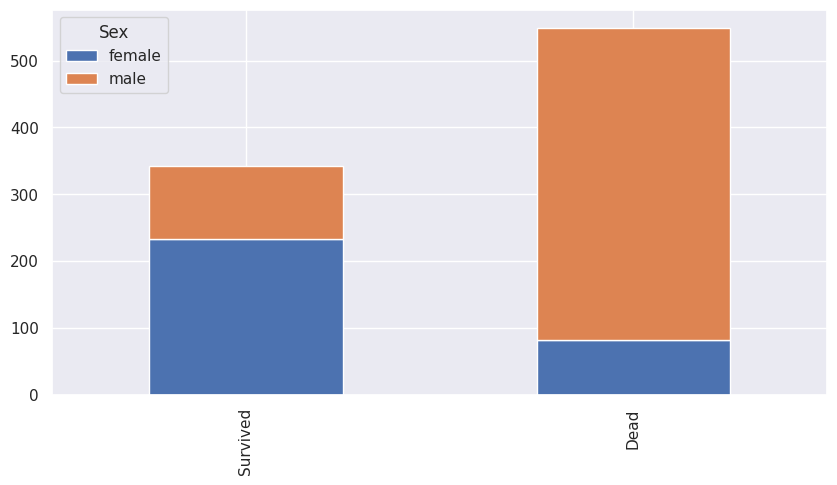

In [14]:
bar_chart('Sex')

* female 생존률 : 0.742038
* male 생존률 :	0.188908


In [15]:
# 1. 성별 생존률 계산
female_survival_rate = train.groupby('Sex')['Survived'].mean()
female_survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


#### 1.2.2 Pclass

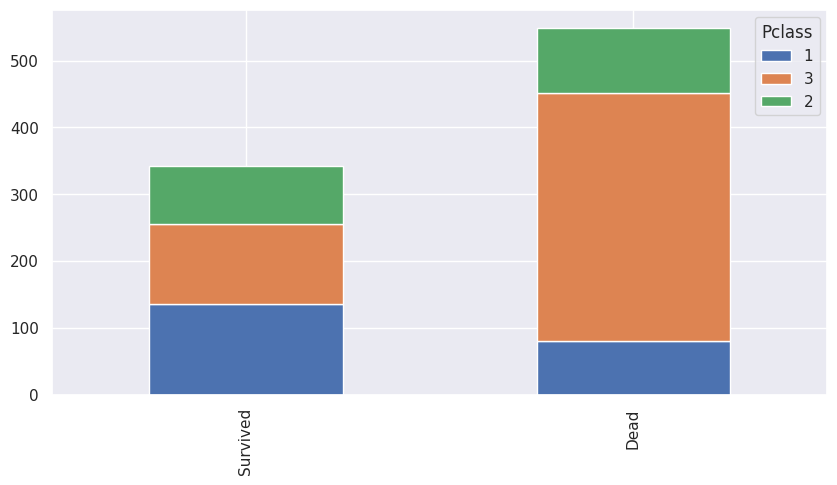

In [16]:
bar_chart('Pclass')
# Pclass = 3인 경우 사망자가 많음

In [17]:
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean()
pclass_survival_rate
# Pclass = 1인 경우 생존률이 가장 높음
# Pclass = 3인 경우 생존률이 가장 낮음

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### 1.2.3 SibSp(함께 탑승한 형제자매, 배우자 수)

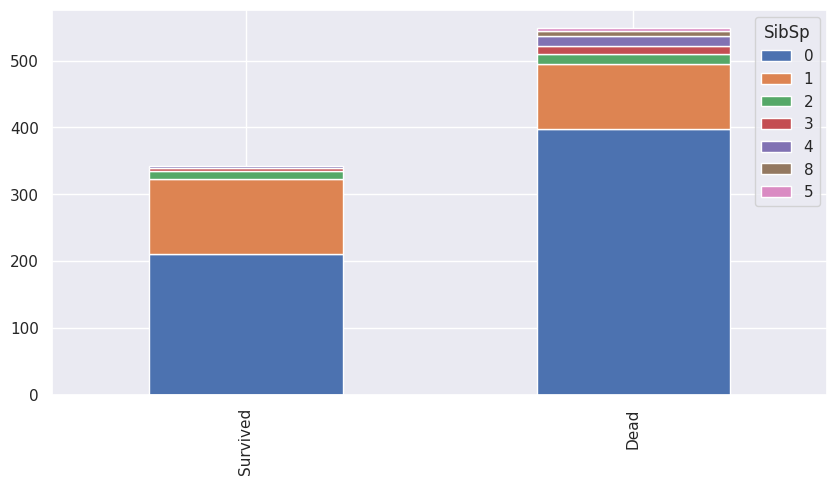

In [18]:
bar_chart('SibSp')

In [19]:
SibSp_survival_rate = train.groupby('SibSp')['Survived'].mean()
SibSp_survival_rate
# SibSp = 1인 경우 생존률이 가장 높음
# SibSp = 5, 8인 경우 생존률이 가장 낮음
# 생존률 : 1 > 2 > 0 > 3 > 4 > 5, 8(생존률 0)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [20]:
train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


#### 1.2.4 Parch(함께 탑승한 부모, 자녀 수)

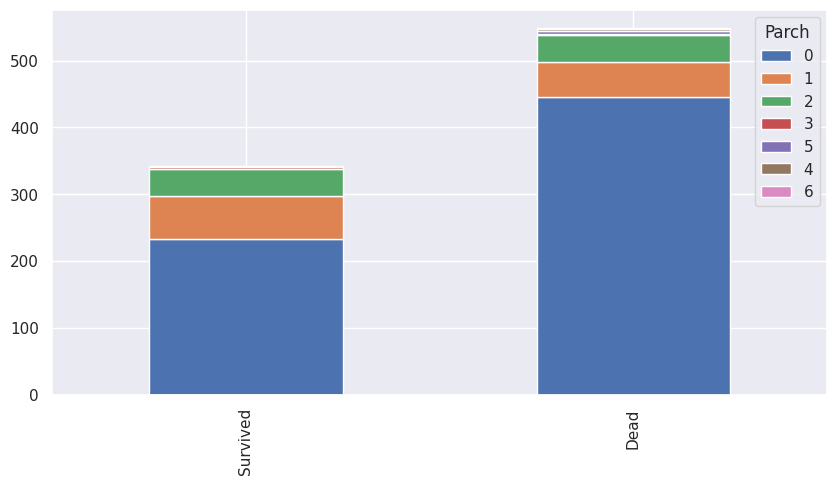

In [21]:
bar_chart('Parch')
# Parch = 0인 경우 사망자가 많음

In [22]:
Parch_survival_rate = train.groupby('Parch')['Survived'].mean()
Parch_survival_rate
# Parch = 3인 경우 생존률이 가장 높음
# Parch = 4, 6인 경우 생존률이 가장 낮음
# 생존률 : 3 > 1 > 2 > 0 > 5 > 4, 6(생존률 0)

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [23]:
train['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


#### 1.2.5 Embarked

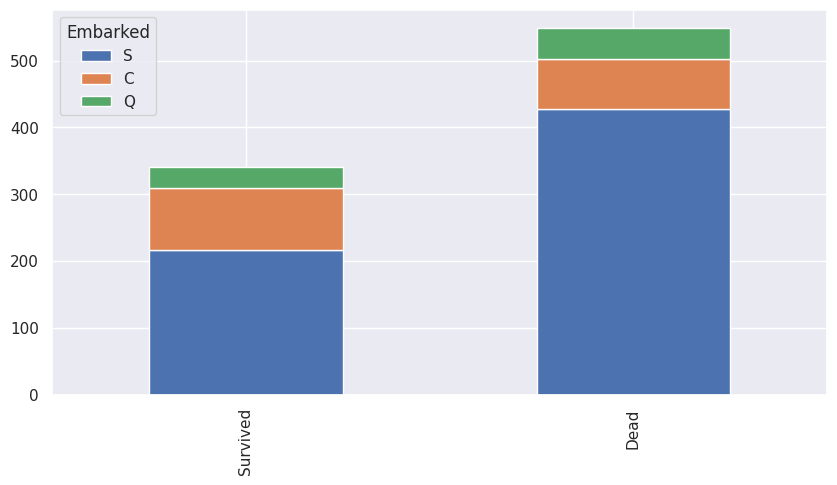

In [24]:
bar_chart('Embarked')
# Embarked = S인 경우 사망자가 많음

In [25]:
embarked_survivla_rate = train.groupby('Embarked')['Survived'].mean()
embarked_survivla_rate

# Embarked = C인 경우 생존률 가장 높음
# Embarked = S인 경우 생존률 가장 낮음

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


# ***2. Feature engineering***

## ***2.1 불필요한 변수 제거***

* Cabin 결측치 많아서 제거
* PassengerId, Name, Ticket 불필요한 변수라 판단하여 제거

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [28]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


## ***2.2 결측치 처리***

* 이상치 비율이 5% 이하 → 이상치 영향이 크지 않음 (평균 사용 가능)
* 이상치 비율이 10~15% 이상 → 이상치가 많다고 볼 수 있음 (중앙값 추천)

In [29]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [30]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


### 2.2.1 Age 결측치 제거(train, test)

In [31]:
# Age 변수 이상치 확인
age_q1 = train['Age'].quantile(0.25)
age_q3 = train['Age'].quantile(0.75)
age_IQR = age_q3 - age_q1

lower_bound = age_q1 - 1.5 * age_IQR
upper_bound = age_q3 + 1.5 * age_IQR

age_outliers = train[(train['Age'] < lower_bound) | (train['Age'] > upper_bound)]
print("Age 변수 이상치 개수 :", len(age_outliers))

Age 변수 이상치 개수 : 11


In [32]:
# Age 변수 이상치 비율 확인
age_outliers_rate = (len(age_outliers) / len(train['Age'])) * 100
print(f"Age 변수 이상치 비율 : {age_outliers_rate : .2f}%")

# 이상치 비율이 낮으므로 결측치를 성별에 따른 Age 평균으로 채움

Age 변수 이상치 비율 :  1.23%


In [33]:
sex_age_mean = train.groupby('Sex')['Age'].mean()
sex_age_mean

,Age
Sex,
female,27.915709
male,30.726645


In [34]:
# train data 결측치 채우기
train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), 'Age'] = sex_age_mean[0]
train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), 'Age'] = sex_age_mean[1]

<ipython-input-34-2c03c9ba4242>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), 'Age'] = sex_age_mean[0]
<ipython-input-34-2c03c9ba4242>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), 'Age'] = sex_age_mean[1]


In [35]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [36]:
# train data 결측치 채우기
test.loc[(test['Sex'] == 'female') & (test['Age'].isnull()), 'Age'] = sex_age_mean[0]
test.loc[(test['Sex'] == 'male') & (test['Age'].isnull()), 'Age'] = sex_age_mean[1]

<ipython-input-36-bbe0034ac78e>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test.loc[(test['Sex'] == 'female') & (test['Age'].isnull()), 'Age'] = sex_age_mean[0]
<ipython-input-36-bbe0034ac78e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test.loc[(test['Sex'] == 'male') & (test['Age'].isnull()), 'Age'] = sex_age_mean[1]


In [37]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


### 2.2.2 Embarked 결측치 제거(train)

* train data 'Embarked' 결측치 : 2개 -> 가장 많은 값으로 채움

In [38]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [39]:
train['Embarked'] = train['Embarked'].fillna('S')

In [40]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


### 2.2.3 Fare 결측치 제거(test)

📌 test data 'Fare' 결측치 : 1개 -> 이상치 비율 확인 후 train data의 'Fare' 변수 평균값 또는 중앙값으로 채움  
📌 모델이 학습하는 기준은 train 데이터이기 때문에 train 데이터의 이상치 비율을 기준으로 봐야 함



In [41]:
# "Fare" 이상치 개수 확인
fare_q1 = train['Fare'].quantile(0.25)
fare_q3 = train['Fare'].quantile(0.75)

fare_IQR = fare_q3 - fare_q1

fare_lower_bound = fare_q1 - 1.5 * fare_q1
fare_upper_bound = fare_q3 + 1.5 * fare_q3

fare_outliers = train[(train['Fare'] < fare_lower_bound) | (train['Fare'] > fare_upper_bound)]
print("Fare 변수 이상치 개수 :", len(fare_outliers))

Fare 변수 이상치 개수 : 90


In [42]:
# "Fare" 이상치 비율 확인
fare_outliers_rate = (len(fare_outliers) / len(train['Fare'])) * 100
print(f"Fare 변수 이상치 비율 : {fare_outliers_rate : .2f}%")

# 이상치 비율이 10%이상이므로 중앙값으로 결측치 채움

Fare 변수 이상치 비율 :  10.10%


In [43]:
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

In [44]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## ***2.3 범주형 변수로 변경***


In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 2.3.1 Sex(train, test)

📌 male = 0, female = 1

In [46]:
train['Sex'] = train['Sex'].replace({'female' : 1, 'male' : 0})
test['Sex'] = test['Sex'].replace({'female' : 1, 'male' :0})

<ipython-input-46-69968b2cadfa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'female' : 1, 'male' : 0})
<ipython-input-46-69968b2cadfa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'female' : 1, 'male' :0})


In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


### 2.3.2 Embarked(train, test)

📌 Q = 0, C = 1, S = 2

In [48]:
train['Embarked'] = train['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})
test['Embarked'] = test['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})

<ipython-input-48-b44a307a87fa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked'] = train['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})
<ipython-input-48-b44a307a87fa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Embarked'] = test['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' : 2})


In [49]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


## ***2.4 연속형 변수 범주형 변수로 변경***



### ***2.4.1 Age 변수(train, test)***

📌 Age 변수 비대칭적 분포(왼쪽으로 치우친 분포)를 보임  
📌 로그 변환으로 정규분포로 변환하면 정규성을 만족하여 트리모델을 제외한 선형 모델에서 좋은 성능을 보일 수 있음  


<Axes: ylabel='Frequency'>

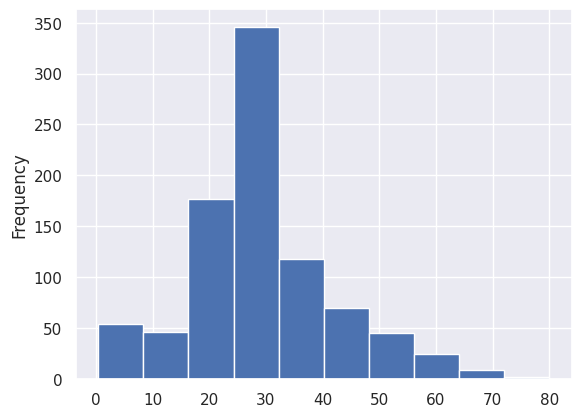

In [50]:
train['Age'].plot(kind = 'hist')

In [51]:
train['Age'].describe()

,Age
count,891.000000
mean,29.736034
std,13.014897
min,0.420000
25%,22.000000
50%,30.000000
75%,35.000000
max,80.000000


In [52]:
test['Age'].describe()

,Age
count,418.000000
mean,30.197890
std,12.648678
min,0.170000
25%,23.000000
50%,29.000000
75%,35.750000
max,76.000000


📌 include_lowest=True를 추가하면 최솟값도 첫 번째 구간에 포함되도록 보장!

In [53]:
bins = [0, 22, 30, 35, 80]  # 최소값(0) ~ 최대값(80) 사이를 4구간으로 나눔
labels = ['0', '1', '2', '3']  # 범주형 라벨

train['Age_group'] = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True)
test['Age_group'] = pd.cut(test['Age'], bins=bins, labels=labels, include_lowest=True)

📌 train, test data Age_group 수치형 변수 타입 변경

In [54]:
train['Age_group'] = train['Age_group'].astype(int)

In [55]:
test['Age_group'] = test['Age_group'].astype(int)

📌 train, test data에서 Age 변수 제거

In [56]:
train = train.drop('Age', axis = 1)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_group'],
      dtype='object')

In [57]:
test = test.drop('Age', axis = 1)
test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_group'], dtype='object')

### ***2.4.2 Fare 변수(train, test)***

📌 'Fare' 변수의 경우 이상치 비율이 10.10%이었으므로 로그 변환해보는 것을 추천

<Axes: ylabel='Frequency'>

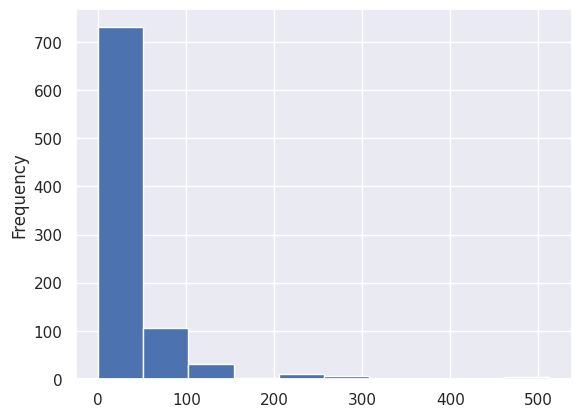

In [58]:
train['Fare'].plot(kind = 'hist')

In [59]:
train['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [60]:
# 로그 변환 (log1p 사용: log(1 + x)로 변환하여 0값 문제 해결)
train["Fare_log"] = np.log1p(train["Fare"])

<Axes: ylabel='Frequency'>

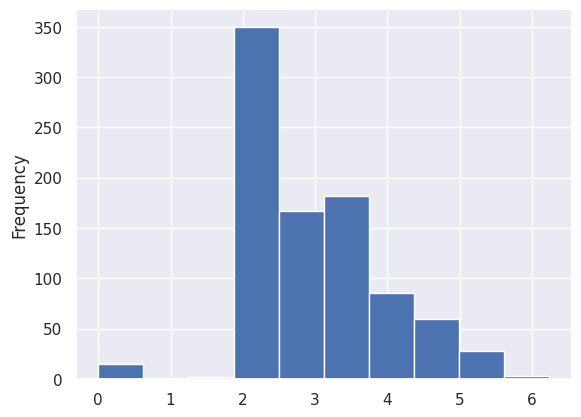

In [61]:
train['Fare_log'].plot(kind = 'hist')

In [62]:
train['Fare_log'].describe()

,Fare_log
count,891.000000
mean,2.962246
std,0.969048
min,0.000000
25%,2.187218
50%,2.737881
75%,3.465736
max,6.240917


In [63]:
test['Fare_log'] = np.log1p(test["Fare"])
test.describe()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group,Fare_log
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,0.447368,0.392344,35.576535,1.535885,1.468900,3.015421
std,0.841838,0.481622,0.896760,0.981429,55.850103,0.685516,1.114646,0.966932
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,7.895800,1.000000,1.000000,2.185579
50%,3.000000,0.000000,0.000000,0.000000,14.454200,2.000000,1.000000,2.737881
75%,3.000000,1.000000,1.000000,0.000000,31.471875,2.000000,2.750000,3.480373
max,3.000000,1.000000,8.000000,9.000000,512.329200,2.000000,3.000000,6.240917


📌 train, test 'Fare' 변수 제거

In [64]:
train = train.drop('Fare', axis = 1)
test = test.drop('Fare', axis = 1)
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_group',
       'Fare_log'],
      dtype='object')

In [65]:
train.loc[train['Parch'] == 3]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_group,Fare_log
86,0,3,0,1,3,2,0,3.566005
437,1,2,1,2,3,2,1,2.983153
736,0,3,1,1,3,2,3,3.566005
774,1,2,1,1,3,2,3,3.178054
858,1,3,1,0,3,1,1,3.008565


## ***2.5 Parch, SibSp 변수 하나의 변수로 합치기(train, test)***

📌 Parch와 SibSp는 가족 구성이라는 공통된 의미를 가지며, 상관계수도 0.41 정도로 관련이 있으므로 Family Size를 만들어 실험해볼 수 있다 → 타당한 접근

In [66]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_group,Fare_log
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,-0.106811,-0.070661,0.329862
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.045702,-0.299908,-0.661022
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,-0.116569,-0.138969,0.263276
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.059961,-0.168249,0.318528
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.078665,-0.092496,0.332186
Embarked,-0.106811,-0.045702,-0.116569,0.059961,0.078665,1.000000,-0.000035,-0.019588
Age_group,-0.070661,-0.299908,-0.138969,-0.168249,-0.092496,-0.000035,1.000000,0.101733
Fare_log,0.329862,-0.661022,0.263276,0.318528,0.332186,-0.019588,0.101733,1.000000


In [67]:
train['family_size'] = train['Parch'] + train['SibSp'] + 1
test['family_size'] = test['Parch'] + test['SibSp'] + 1

📌 'Parch', 'SibSp' 변수 제거(train, test)

In [68]:
train = train.drop(['Parch','SibSp'], axis = 1)
test = test.drop(['Parch','SibSp'], axis = 1)

In [69]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_log',
       'family_size'],
      dtype='object')

In [70]:
test.columns

Index(['Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_log', 'family_size'], dtype='object')

In [71]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Embarked,0
Age_group,0
Fare_log,0
family_size,0


In [72]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Embarked,0
Age_group,0
Fare_log,0
family_size,0


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Embarked     891 non-null    int64  
 4   Age_group    891 non-null    int64  
 5   Fare_log     891 non-null    float64
 6   family_size  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


# ***3. Modeling***

* Logisitic Regression 정확도 : 0.8045
* KNN 정확도 : 0.7877
* DT 정확도 : 0.8045
* random forest 정확도 : 0.8156
* SVM 정확도 : 0.7877
* XGBoost 정확도 : 0.8212
* GBM 정확도 : 0.8156

In [78]:
# 독립변수 종속변수 분리
features = ['Pclass', 'Sex', 'Embarked', 'Age_group', 'Fare_log','family_size']
X = train[features]
y = train['Survived']

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(712, 6)

In [ ]:
X_val.shape

(179, 6)

In [ ]:
X_train.head()

,Pclass,Sex,Embarked,Age_group,Fare_log,family_size
331,1,0,2,3,3.384390,1
733,2,0,2,1,2.639057,1
382,3,0,2,2,2.188856,1
704,3,0,2,1,2.180892,2
813,3,1,2,0,3.474293,7


In [ ]:
X_val.head()

,Pclass,Sex,Embarked,Age_group,Fare_log,family_size
709,3,0,1,2,2.787834,3
439,2,0,2,2,2.442347,1
840,3,0,2,0,2.188856,1
720,2,1,2,0,3.526361,2
39,3,1,1,0,2.504848,2


## ***3.1 Logsitic Regression(정확도 : 0.8045)***

✅ X_train에서는 fit_transform()을 사용해야 하는 이유
X_train에서 데이터의 평균과 표준편차를 학습해야 함.
이 통계를 기반으로 X_train을 표준화해야 함.  
✅ X_test에서는 transform()만 사용해야 하는 이유
모델이 테스트 데이터의 분포를 모른다고 가정해야 함!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# 모델, 필요한 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logistic = LogisticRegression()

# 모델 학습
logistic.fit(X_train, y_train)

# 예측
y_pred = logistic.predict(X_val)

In [ ]:
# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f"로지스틱 회귀분석 정확도 : {accuracy : .4f}")

로지스틱 회귀분석 정확도 :  0.8045


In [ ]:
# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[91 14]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## ***3.2 KNN(정확도 : 0.7877)***

In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()

# 모델 학습
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_val)

In [ ]:
# 정확도 평가
accuracy = accuracy_score(y_val, y_pred)
print(f"KNN 정확도 : {accuracy :.4f}")

KNN 정확도 : 0.7877


In [ ]:
# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[86 19]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## ***3.3 Decision Tree(정확도 : 0.8045 )***

In [ ]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# 모델 학습
dt.fit(X_train, y_train)

# 모델 예측
y_pred = dt.predict(X_val)

In [ ]:
# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"DT 정확도 : {accuracy :.4f}")

DT 정확도 : 0.8045


In [ ]:
# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## ***3.4 Random Forest(정확도 : 0.8156)***

In [ ]:
# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# 모델 학습
rf.fit(X_train, y_train)

# 모델 예측
y_pred = rf.predict(X_val)

In [ ]:
# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest 정확도 : {accuracy :.4f}")

Random Forest 정확도 : 0.8156


In [ ]:
# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

[[91 14]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



## ***3.5 SVM(정확도 : 0.7877)***

In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 모델 불러오기
from sklearn.svm import SVC
svc = SVC()

# 모델 학습
svc.fit(X_train, y_train)

# 모델 예측
y_pred = svc.predict(X_val)

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"SVM 정확도 : {accuracy :.4f}")

# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

SVM 정확도 : 0.7877
[[94 11]
 [27 47]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       105
           1       0.81      0.64      0.71        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



## ***3.6 XGBoost(정확도 : 0.8212)***

In [ ]:
# 모델 불러오기
from xgboost import XGBClassifier
xgb = XGBClassifier()

# 모델 학습
xgb.fit(X_train, y_train)

# 모델 예측
y_pred = xgb.predict(X_val)

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"XGBoost 정확도 : {accuracy :.4f}")

# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

XGBoost 정확도 : 0.8212
[[90 15]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## ***3.7 GBM(정확도 : 0.8156)***

In [ ]:
# 모델 불러오기
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# 모델 학습
gbm.fit(X_train, y_train)

# 모델 예측
y_pred = gbm.predict(X_val)

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_val, y_pred)
print(f"GBM 정확도 : {accuracy :.4f}")

# 혼동행렬, 분류 보고서
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)

GBM 정확도 : 0.8156
[[93 12]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



# ***4. 해석 및 인사이트***
✅ 1. 데이터는 완전히 선형적이지 않음 (선형 + 비선형 혼합)  
Logistic Regression과 Decision Tree의 정확도가 같음 (0.8045)
→ 데이터에 선형적인 경향이 일부 존재함을 의미  
트리 기반 모델 (Random Forest, GBM, XGBoost)이 더 높은 정확도를 보임
→ 비선형적인 패턴도 존재하며, 트리 모델이 이를 잘 잡아내고 있음  
→ 즉, 데이터는 선형 + 비선형 요소가 섞인 구조

✅ 2. KNN, SVM 낮은 성능
-> 거리 기반(knn)과 커널 기반(svm) 방식이 데이터와 잘 맞지 않음  
   

🚀 최종 결론 및 추천 전략
1. XGBoost가 가장 적합한 모델  
2. 트리 기반 모델이 효과적이므로, 부스팅 모델을 최적화하는 것이 중요  
3. KNN과 SVM은 비효율적이므로 사용하지 않는 것이 좋음


# ***5. XGBoost 하이퍼파라미터 튜닝***

## ***5.1 XGBoost 하이퍼파라미터 튜닝***
📌 랜덤 서치 -> 완전 그리드 서치  
📌 model = XGBClassifier(n_estimators = 100, learning_rate = 0.3, max_depth = 6, subsample = 1.0, colsample_bytree = 1.0, gamma = 0)  
📌 무조건 그리드 서치를 더 하는 것이 아니라, 정밀 조정(Fine-tuning)이 필요함.
learning_rate, max_depth, gamma, n_estimators 같은 핵심 하이퍼파라미터를 좁은 범위에서 미세 조정하는 것이 효과적. 완전 그리드 서치 비효율적일 수 있음

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

# XGBoost 모델 생성 (기본 설정)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# ======================================
# 1. RandomizedSearchCV로 대략적인 하이퍼파라미터 범위 탐색
# ======================================
param_dist = {
    "n_estimators": np.arange(50, 400, 50),              # 50, 100, 150, ... 350
    "learning_rate": np.linspace(0.001, 0.5, 10),       # 10가지 값
    "max_depth": np.arange(3, 10, 1),                   # 3,4,5,6,7,8,9
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],       # 데이터 샘플링 비율
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 특성 샘플링 비율
    "gamma": [0, 0.1, 0.2, 0.3, 0.5, 1.0],             # 분할 최소 손실 감소
    "reg_lambda": [0, 0.1, 0.5, 1.0, 5.0],             # L2 정규화
    "reg_alpha": [0, 0.1, 0.5, 1.0, 5.0]               # L1 정규화
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,           # 50번의 랜덤 샘플링
    cv=5,                # 5-fold 교차 검증
    scoring='accuracy',  # 정확도를 기준으로 평가 (원하는 평가 지표로 변경 가능)
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

# ✅ 랜덤 서치 결과 정리 및 출력
results_df = pd.DataFrame(random_search.cv_results_)[['mean_test_score', 'params']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
print("\n🔹 Random Search 결과 (상위 5개):\n", results_df.head())

# ✅ 랜덤 서치 최적의 하이퍼파라미터 사용
best_params = random_search.best_params_
print("\n✅ 랜덤 서치 최적의 파라미터:", best_params)
print("✅ 랜덤 서치 최고 정확도:", random_search.best_score_)


🔹 Random Search 결과 (상위 5개):
     mean_test_score                                             params
45         0.824407  {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alp...
22         0.823008  {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alp...
24         0.818783  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha...
9          0.817394  {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha...
7          0.817394  {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alp...

✅ 랜덤 서치 최적의 파라미터: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05644444444444444, 'gamma': 1.0, 'colsample_bytree': 1.0}
✅ 랜덤 서치 최고 정확도: 0.8244065793361568


In [ ]:
# Random Search 결과 DataFrame에서 상위 5개 파라미터 상세 출력
top_n = 5  # 상위 N개 결과 출력
for i, row in results_df.head(top_n).iterrows():
    print(f"\n {i+1} - 정확도: {row['mean_test_score']:.6f}")
    print(f"  하이퍼파라미터: {row['params']}")


 46 - 정확도: 0.824407
  하이퍼파라미터: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05644444444444444, 'gamma': 1.0, 'colsample_bytree': 1.0}

 23 - 정확도: 0.823008
  하이퍼파라미터: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.05644444444444444, 'gamma': 1.0, 'colsample_bytree': 0.7}

 25 - 정확도: 0.818783
  하이퍼파라미터: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 5.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 0.8}

 10 - 정확도: 0.817394
  하이퍼파라미터: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 5.0, 'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.22277777777777777, 'gamma': 0.3, 'colsample_bytree': 0.7}

 8 - 정확도: 0.817394
  하이퍼파라미터: {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.16733333333333333, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [ ]:
k# 2. GridSearchCV로 미세 조정 (최적값 중심)
# ======================================
# 최적값을 중심으로 좁은 범위의 그리드 서치 수행
param_grid = {
    'learning_rate': [best_params['learning_rate'] * 0.8, best_params['learning_rate'], best_params['learning_rate'] * 1.2],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'gamma': [best_params['gamma'] * 0.8, best_params['gamma'], best_params['gamma'] * 1.2]
}

# XGBoost 모델 초기화 (랜덤 서치 최적값 적용)
model = XGBClassifier(
    subsample=best_params['subsample'],
    reg_lambda=best_params['reg_lambda'],
    reg_alpha=best_params['reg_alpha'],
    colsample_bytree=best_params['colsample_bytree'],
    eval_metric='logloss'
)

# GridSearchCV 실행
grid_search = GridSearchCV(
    model, param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("\n 그리드 서치 최적 하이퍼파라미터:", grid_search.best_params_)
print(" 그리드 서치 최고 정확도:", grid_search.best_score_)

#  최적 모델로 검증 세트 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n 검증 데이터 정확도:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits

 그리드 서치 최적 하이퍼파라미터: {'gamma': 1.0, 'learning_rate': 0.05644444444444444, 'max_depth': 10, 'n_estimators': 250}
 그리드 서치 최고 정확도: 0.8188220230473752

 검증 데이터 정확도: 0.8156424581005587


## ***5.2 XGBoost 하이퍼파라미터 튜닝 -> 해당 하이퍼파라미터가 최적일 것 같음***
📌 랜덤 서치 -> 미세조정 그리드 서치

📌 그리드 서치 하이퍼파라미터 범위  
* learning_rate: 0.05 ~ 0.06 (0.05 단위) learning_rate가 0.0564 근처에서 최적이었으므로, 0.05~0.06 사이에서 세밀하게 탐색, 후보값: [0.05, 0.055, 0.06]  \\
*
max_depth: 7 ~ 9 (1 단위) 현재 최적값이 8 또는 9인 경우가 많으므로, 7~9 사이에서 최적값 탐색, 후보값: [7, 8, 9]  \\

* n_estimators: 200 ~ 250 (1 단위) 보통 50 단위로 튜닝하는데, 1 단위로 하면 계산량이 너무 많을 수도 있음.
만약 세밀하게 하고 싶다면 [200, 210, 220, 230, 240, 250]으로 설정 가능  \\

* gamma: 0.5 ~ 1.0 (0.1 단위) gamma가 1.0 근처에서 높은 성능을 보였으므로, 0.5~1.0 사이 탐색, 후보값: [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# ✅ 최적 하이퍼파라미터 범위 설정
param_grid = {
    'learning_rate': [0.05, 0.055, 0.06],
    'max_depth': [7, 8, 9],
    'n_estimators': [200, 210, 220, 230, 240, 250],  # 너무 많으면 200~250 (10단위)로 조정 가능
    'gamma': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# ✅ XGBoost 모델 초기화 (랜덤 서치 최적값 기반)
model = XGBClassifier(
    subsample=0.7,  # 최적값 고정
    reg_lambda=0.5,
    reg_alpha=0.1,
    colsample_bytree=1.0,
    eval_metric='logloss'
)

# ✅ GridSearchCV 실행 (StratifiedKFold 사용)
grid_search = GridSearchCV(
    model, param_grid,
    scoring='accuracy',
    cv=5,  # K-Fold 교차 검증
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# ✅ 최적 하이퍼파라미터 출력
print("\n✅ 그리드 서치 최적 하이퍼파라미터:", grid_search.best_params_)
print("✅ 그리드 서치 최고 정확도:", grid_search.best_score_)

# ✅ 최적 모델로 검증 세트 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n✅ 검증 데이터 정확도:", accuracy)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

✅ 그리드 서치 최적 하이퍼파라미터: {'gamma': 1.0, 'learning_rate': 0.06, 'max_depth': 9, 'n_estimators': 250}
✅ 그리드 서치 최고 정확도: 0.8159952723333006

✅ 검증 데이터 정확도: 0.8156424581005587


## ***5.3 XGBoost 하이퍼파라미터 튜닝***
📌 랜덤 서치 -> 미세조정 그리드 서치  
📌 이전보다 모델 개수가 늘었지만 정확도가 떨어짐 -> 더 이상 미세 조정 의미 없음

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# ✅ 최적 하이퍼파라미터 범위 설정
param_grid = {
    'learning_rate': [0.054, 0.056, 0.058, 0.06, 0.062],  # 🔍 기존 최적 범위 중심으로 미세 조정
    'max_depth': [8, 9, 10],  # ✅ max_depth=9가 최적일 가능성 크지만, 한 단계 위아래 확인
    'n_estimators': [230, 240, 250, 260, 270]  # 🔍 너무 촘촘한 1 단위 대신 10 단위 조정
}

# ✅ XGBoost 모델 초기화 (랜덤 서치 최적값 기반)
model = XGBClassifier(
    subsample=0.7,  # 최적값 고정
    reg_lambda=0.5,
    gamma = 1.0,
    reg_alpha=0.1,
    colsample_bytree=1.0,
    eval_metric='logloss'
)

# ✅ GridSearchCV 실행 (StratifiedKFold 사용)
grid_search = GridSearchCV(
    model, param_grid,
    scoring='accuracy',
    cv=5,  # K-Fold 교차 검증
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# ✅ 최적 하이퍼파라미터 출력
print("\n✅ 그리드 서치 최적 하이퍼파라미터:", grid_search.best_params_)
print("✅ 그리드 서치 최고 정확도:", grid_search.best_score_)

# ✅ 최적 모델로 검증 세트 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n✅ 검증 데이터 정확도:", accuracy)


Fitting 5 folds for each of 75 candidates, totalling 375 fits

✅ 그리드 서치 최적 하이퍼파라미터: {'learning_rate': 0.06, 'max_depth': 9, 'n_estimators': 270}
✅ 그리드 서치 최고 정확도: 0.8188023244361272

✅ 검증 데이터 정확도: 0.8100558659217877


# ***6. Random Forest 하이퍼파라미터 튜닝***

## ***6.1 Random Forest 하이퍼파라미터 튜닝***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# 모델 설정
rf = RandomForestClassifier()

# Random Search
param_dist = {
    'n_estimators' : np.arange(100, 500, 50),
    'max_depth' : np.arange(3, 20, 2),
    'min_samples_split' : np.arange(2, 10, 1),
    'min_samples_leaf' : np.arange(1, 5, 1),
    'bootstrap' : [True, False]
}

random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist,
    n_iter = 50,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    random_state = 42
)

random_search.fit(X_train, y_train)

# 랜덤 서치 결과 출력
result_df = pd.DataFrame(random_search.cv_results_)[['mean_test_score', 'params']]
result_df = result_df.sort_values(by = 'mean_test_score', ascending = False)
print("\n Random Search 결과(상위 5개):\n", result_df.head())

# 최적의 하이퍼파라미터
best_params = random_search.best_params_
print("\n 랜덤 서치 최적의 파라미터:", best_params)
print("랜덤 서치 최고의 정확도", random_search.best_score_)


 Random Search 결과(상위 5개):
     mean_test_score                                             params
45         0.820181  {'n_estimators': 450, 'min_samples_split': 5, ...
27         0.818783  {'n_estimators': 250, 'min_samples_split': 5, ...
0          0.817384  {'n_estimators': 100, 'min_samples_split': 7, ...
37         0.817364  {'n_estimators': 100, 'min_samples_split': 7, ...
25         0.817364  {'n_estimators': 350, 'min_samples_split': 5, ...

 랜덤 서치 최적의 파라미터: {'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}
랜덤 서치 최고의 정확도 0.8201812272234807


In [ ]:
# Random Search 결과 DataFrame에서 상위 5개 파라미터 상세 출력
top_n = 5  # 상위 N개 결과 출력
for i, row in result_df.head(top_n).iterrows():
    print(f"\n {i+1} - 정확도: {row['mean_test_score']:.6f}")
    print(f"  하이퍼파라미터: {row['params']}")


 46 - 정확도: 0.820181
  하이퍼파라미터: {'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}

 28 - 정확도: 0.818783
  하이퍼파라미터: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}

 1 - 정확도: 0.817384
  하이퍼파라미터: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 13, 'bootstrap': True}

 38 - 정확도: 0.817364
  하이퍼파라미터: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}

 26 - 정확도: 0.817364
  하이퍼파라미터: {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': False}


In [ ]:
# Random Search 기반으로 Grid Search
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# 최적 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators' : np.arange(240, 460, 5),
    'min_samples_split' : np.arange(4, 8, 1),
    'min_samples_leaf' : np.arange(2, 5, 1),
    'max_depth' : np.arange(4, 13, 1),
    'bootstrap' : [True, False]
}

# Grid Search 실행
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

# 학습 진행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("그리드 서치 최적의 하이퍼파라미터 :", grid_search.best_params_)
print("그리드 서치 최고의 정확도:", grid_search.best_score_)

# 최적 모델로 검증 세트 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"검증 데이터 정확도: {accuracy :.4f}")

Fitting 5 folds for each of 9504 candidates, totalling 47520 fits
